In [ ]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/archive/parkinsons_disease_data.csv')

In [ ]:
# Veri Setini Bağımlı ve Bağımsız Niteliklere Ayırmak
X = df.iloc[:, 1:33].values
y = df.iloc[:, 33].values

Bir pandas DataFrame'i üzerinde işlemler yaparak bağımlı (target) ve bağımsız (özellik) değişkenleri ayırır.
DataFrame'deki satır ve sütunlara integer tabanlı indeksleme yapmamızı sağlar. iloc kullanarak belirli bir satır veya sütun dilimini seçebilirsiniz.
.values: Seçilen sütunları bir numpy array formatına dönüştürür. Bu, verilerin sayısal bir formatta işlenmesini sağlar.

**Veriyi Eğitim ve Test Olarak Ayırmak**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Normalizasyon - Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

***KARAR AĞACI MODELİ OLUŞTURMAK VE EĞİTMEK***


 scikit-learn kütüphanesi tree modülü DecisionTreeClassifier sınıfından yaratacağımız classifier nesnesi ile modelimiz oluşturalım. İlk parametrede ağaç oluşturma kriteri olarak entropi seçildi.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Test Seti ile Tahmin Yapmak**

Ayırdığımız test setimizi (X_test) kullanarak oluşturduğumuz model ile tahmin yapalım  ve elde ettiğimiz set (y_pred) ile hedef değişken (y_test) test setimizi karşılaştıralım.

In [ ]:
y_pred = classifier.predict(X_test)

**Hata Matrisini Oluşturmak**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[157  32]
 [ 28 310]]


In [ ]:
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,classifier.predict(X_train)))
print("Test verisi doğruluğu:",metrics.accuracy_score(y_test,y_pred))

Eğitim verisi doğruluğu: 1.0
Test verisi doğruluğu: 0.8861480075901328


In [ ]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Duyarlılık (Sensitivity):", sensitivity)
print("Özgüllük (Specificity):", specificity)


Duyarlılık (Sensitivity): 0.9171597633136095
Özgüllük (Specificity): 0.8306878306878307


In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

F1 Skoru: 0.9117647058823529


In [ ]:
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.7513525415198792


AUC: 0.8739237970007201


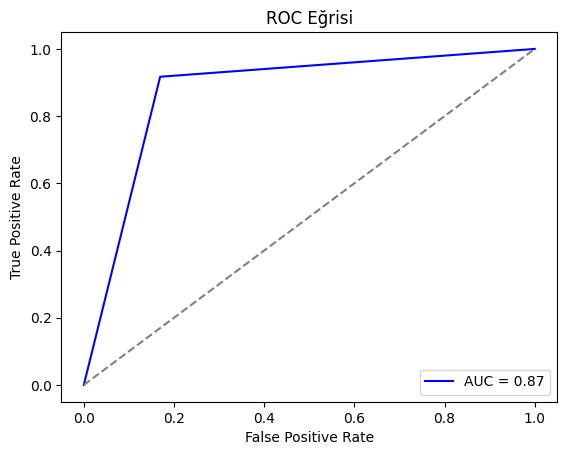

In [ ]:
y_proba = classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print("AUC:", auc)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       189
           1       0.91      0.92      0.91       338

    accuracy                           0.89       527
   macro avg       0.88      0.87      0.88       527
weighted avg       0.89      0.89      0.89       527



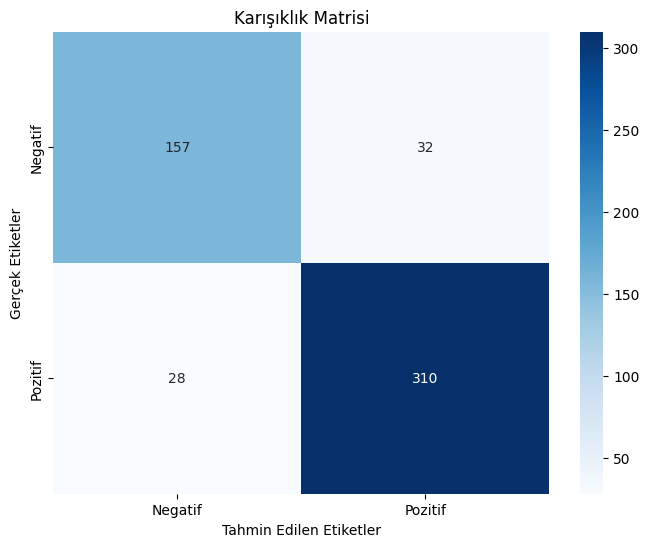

In [ ]:
# Tahminleri oluştur
y_pred = classifier.predict(X_test)

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()